<a href="https://colab.research.google.com/github/arghya53/TimeSeriesAnalysis/blob/main/Multiple_TimeSeries_using_ProphetModel_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Here, we have aggregated multiple time series data from three weather forecasting corporation and applied univariate time series analysis to train a Prophet model.

In [ ]:
!pip install download

In [ ]:
!pip install prophet

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import datetime
import os
from download import download
import plotly.express as px

mpl.rcParams['figure.figsize']=(10,8)
mpl.rcParams['axes.grid']=False

In [ ]:
path = download('https://archive.ics.uci.edu/ml/machine-learning-databases/00501/PRSA2017_Data_20130301-20170228.zip', '/tmp/aq', kind = 'zip')

Replace is False and data exists, so doing nothing. Use replace=True to re-download the data.


In [ ]:
!ls /tmp/aq/PRSA_Data_20130301-20170228/

PRSA_Data_Aotizhongxin_20130301-20170228.csv  PRSA_Data_Huairou_20130301-20170228.csv
PRSA_Data_Changping_20130301-20170228.csv     PRSA_Data_Nongzhanguan_20130301-20170228.csv
PRSA_Data_Dingling_20130301-20170228.csv      PRSA_Data_Shunyi_20130301-20170228.csv
PRSA_Data_Dongsi_20130301-20170228.csv	      PRSA_Data_Tiantan_20130301-20170228.csv
PRSA_Data_Guanyuan_20130301-20170228.csv      PRSA_Data_Wanliu_20130301-20170228.csv
PRSA_Data_Gucheng_20130301-20170228.csv       PRSA_Data_Wanshouxigong_20130301-20170228.csv


In [ ]:
def convert_to_date(x):
  return datetime.strptime(x, '%Y %m %d %H')

In [ ]:
aq_df_sh = pd.read_csv('/tmp/aq/PRSA_Data_20130301-20170228/PRSA_Data_Shunyi_20130301-20170228.csv', parse_dates= [['year', 'month', 'day', 'hour']], date_parser=convert_to_date)

In [ ]:
aq_df_wa = pd.read_csv('/tmp/aq/PRSA_Data_20130301-20170228/PRSA_Data_Wanliu_20130301-20170228.csv', parse_dates= [['year', 'month', 'day', 'hour']], date_parser=convert_to_date)

In [ ]:
aq_df_gu = pd.read_csv('/tmp/aq/PRSA_Data_20130301-20170228/PRSA_Data_Gucheng_20130301-20170228.csv', parse_dates= [['year', 'month', 'day', 'hour']], date_parser=convert_to_date)

In [ ]:
aq_df = pd.concat([aq_df_sh, aq_df_gu, aq_df_wa], ignore_index=True, sort=False)

In [ ]:
aq_df

,year_month_day_hour,No,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,2013-03-01 00:00:00,1,3.0,6.0,3.0,8.0,300.0,44.0,-0.9,1025.8,-20.5,0.0,NW,9.3,Shunyi
1,2013-03-01 01:00:00,2,12.0,12.0,3.0,7.0,300.0,47.0,-1.1,1026.1,-21.3,0.0,NW,9.4,Shunyi
2,2013-03-01 02:00:00,3,14.0,14.0,NaN,7.0,200.0,22.0,-1.7,1026.2,-23.0,0.0,NW,8.6,Shunyi
3,2013-03-01 03:00:00,4,12.0,12.0,3.0,5.0,NaN,NaN,-2.1,1027.3,-23.3,0.0,NW,6.6,Shunyi
4,2013-03-01 04:00:00,5,12.0,12.0,3.0,NaN,200.0,11.0,-2.4,1027.7,-22.9,0.0,NW,4.5,Shunyi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105187,2017-02-28 19:00:00,35060,11.0,27.0,4.0,20.0,300.0,81.0,12.6,1011.9,-14.3,0.0,N,2.0,Wanliu
105188,2017-02-28 20:00:00,35061,15.0,43.0,6.0,55.0,500.0,45.0,9.4,1012.3,-11.9,0.0,WSW,1.0,Wanliu
105189,2017-02-28 21:00:00,35062,13.0,35.0,7.0,48.0,500.0,48.0,8.7,1012.8,-13.7,0.0,N,1.1,Wanliu
105190,2017-02-28 22:00:00,35063,12.0,31.0,5.0,47.0,500.0,50.0,7.8,1012.9,-12.6,0.0,NNE,1.0,Wanliu


In [ ]:
aq_df = aq_df.drop(['No'], axis=1)

In [ ]:
aq_df

,year_month_day_hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,2013-03-01 00:00:00,3.0,6.0,3.0,8.0,300.0,44.0,-0.9,1025.8,-20.5,0.0,NW,9.3,Shunyi
1,2013-03-01 01:00:00,12.0,12.0,3.0,7.0,300.0,47.0,-1.1,1026.1,-21.3,0.0,NW,9.4,Shunyi
2,2013-03-01 02:00:00,14.0,14.0,NaN,7.0,200.0,22.0,-1.7,1026.2,-23.0,0.0,NW,8.6,Shunyi
3,2013-03-01 03:00:00,12.0,12.0,3.0,5.0,NaN,NaN,-2.1,1027.3,-23.3,0.0,NW,6.6,Shunyi
4,2013-03-01 04:00:00,12.0,12.0,3.0,NaN,200.0,11.0,-2.4,1027.7,-22.9,0.0,NW,4.5,Shunyi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105187,2017-02-28 19:00:00,11.0,27.0,4.0,20.0,300.0,81.0,12.6,1011.9,-14.3,0.0,N,2.0,Wanliu
105188,2017-02-28 20:00:00,15.0,43.0,6.0,55.0,500.0,45.0,9.4,1012.3,-11.9,0.0,WSW,1.0,Wanliu
105189,2017-02-28 21:00:00,13.0,35.0,7.0,48.0,500.0,48.0,8.7,1012.8,-13.7,0.0,N,1.1,Wanliu
105190,2017-02-28 22:00:00,12.0,31.0,5.0,47.0,500.0,50.0,7.8,1012.9,-12.6,0.0,NNE,1.0,Wanliu


In [ ]:
aq_df = aq_df.set_index('year_month_day_hour').groupby('station').resample('D').mean() # we grouped the data according to name of weather forecast stations

<ipython-input-50-dcc35c7f5f2e>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [ ]:
aq_df

PM2.5        PM10        SO2        NO2  \
station year_month_day_hour                                                 
Gucheng 2013-03-01             8.625000   16.875000   7.391304  14.250000   
        2013-03-02            36.916667   51.375000  37.291667  37.565217   
        2013-03-03            80.333333  120.041667  47.541667  63.333333   
        2013-03-04            26.500000   51.291667  18.666667  32.666667   
        2013-03-05           136.708333  172.541667  75.130435  73.500000   
...                                 ...         ...        ...        ...   
Wanliu  2017-02-24            21.458333   39.666667   8.750000  55.875000   
        2017-02-25             8.250000   21.166667   6.375000  36.916667   
        2017-02-26            27.125000   44.583333  14.250000  69.916667   
        2017-02-27            64.000000   95.916667  17.869565  89.826087   
        2017-02-28             9.958333   25.583333   7.458333  40.916667   

                                      CO         O3       TEMP         PRES  \
station year_month_day_hour                                                   
Gucheng 2013-03-01            869.565217  77.130435   1.691667  1024.816667   
        2013-03-02           1479.041667  39.583333   0.820833  1024.900000   
        2013-03-03           2349.708333  33.708333   6.562500  1012.566667   
        2013-03-04           1170.666667  67.250000   9.795833  1015.608333   
        2013-03-05           1381.545455  84.375000   6.750000  1008.883333   
...                                  ...        ...        ...          ...   
Wanliu  2017-02-24            837.500000  38.583333   4.395833  1019.466667   
        2017-02-25            491.666667  56.375000   6.387500  1017.287500   
        2017-02-26            887.500000  30.250000   6.720833  1018.758333   
        2017-02-27           1643.478261  17.136364   7.220833  1015.554167   
        2017-02-28            479.166667  54.791667  10.516667  1013.345833   

                                  DEWP  RAIN      WSPM  
station year_month_day_hour                             
Gucheng 2013-03-01          -19.691667   0.0  2.350000  
        2013-03-02          -16.337500   0.0  1.087500  
        2013-03-03          -11.991667   0.0  1.400000  
        2013-03-04          -11.945833   0.0  1.541667  
        2013-03-05           -7.741667   0.0  0.841667  
...                                ...   ...       ...  
Wanliu  2017-02-24          -10.583333   0.0  1.262500  
        2017-02-25           -9.900000   0.0  1.466667  
        2017-02-26           -7.558333   0.0  1.562500  
        2017-02-27           -6.333333   0.0  1.316667  
        2017-02-28          -12.266667   0.0  1.800000  

[4383 rows x 11 columns]

In [ ]:
aq_df = aq_df.reset_index()

In [ ]:
aq_df

,station,year_month_day_hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
0,Gucheng,2013-03-01,8.625000,16.875000,7.391304,14.250000,869.565217,77.130435,1.691667,1024.816667,-19.691667,0.0,2.350000
1,Gucheng,2013-03-02,36.916667,51.375000,37.291667,37.565217,1479.041667,39.583333,0.820833,1024.900000,-16.337500,0.0,1.087500
2,Gucheng,2013-03-03,80.333333,120.041667,47.541667,63.333333,2349.708333,33.708333,6.562500,1012.566667,-11.991667,0.0,1.400000
3,Gucheng,2013-03-04,26.500000,51.291667,18.666667,32.666667,1170.666667,67.250000,9.795833,1015.608333,-11.945833,0.0,1.541667
4,Gucheng,2013-03-05,136.708333,172.541667,75.130435,73.500000,1381.545455,84.375000,6.750000,1008.883333,-7.741667,0.0,0.841667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4378,Wanliu,2017-02-24,21.458333,39.666667,8.750000,55.875000,837.500000,38.583333,4.395833,1019.466667,-10.583333,0.0,1.262500
4379,Wanliu,2017-02-25,8.250000,21.166667,6.375000,36.916667,491.666667,56.375000,6.387500,1017.287500,-9.900000,0.0,1.466667
4380,Wanliu,2017-02-26,27.125000,44.583333,14.250000,69.916667,887.500000,30.250000,6.720833,1018.758333,-7.558333,0.0,1.562500
4381,Wanliu,2017-02-27,64.000000,95.916667,17.869565,89.826087,1643.478261,17.136364,7.220833,1015.554167,-6.333333,0.0,1.316667


<Axes: xlabel='year_month_day_hour'>

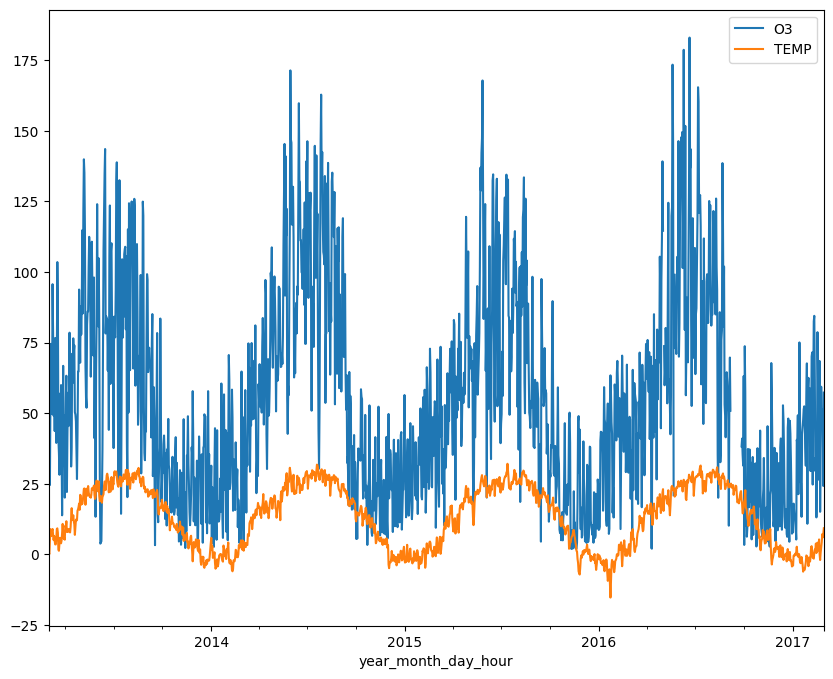

In [ ]:
aq_df.set_index('year_month_day_hour').query(" station == 'Shunyi' ")[['O3', 'TEMP']].plot() # plotting 03 and TEMP data of the Shunyi station

<Axes: xlabel='year_month_day_hour'>

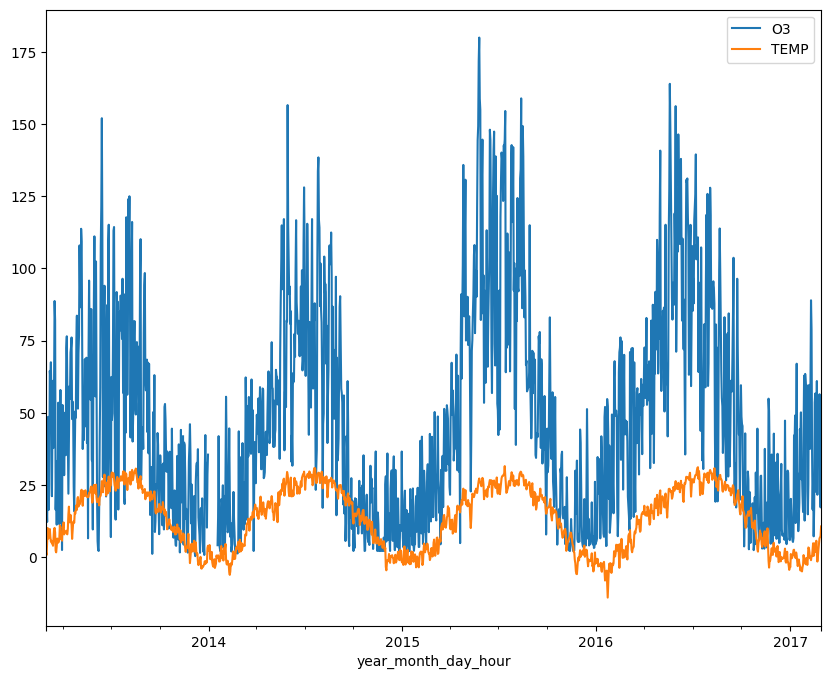

In [ ]:
aq_df.set_index('year_month_day_hour').query(" station == 'Wanliu' ")[['O3', 'TEMP']].plot() # plotting 03 and TEMP data of the Shunyi station

<Axes: xlabel='year_month_day_hour'>

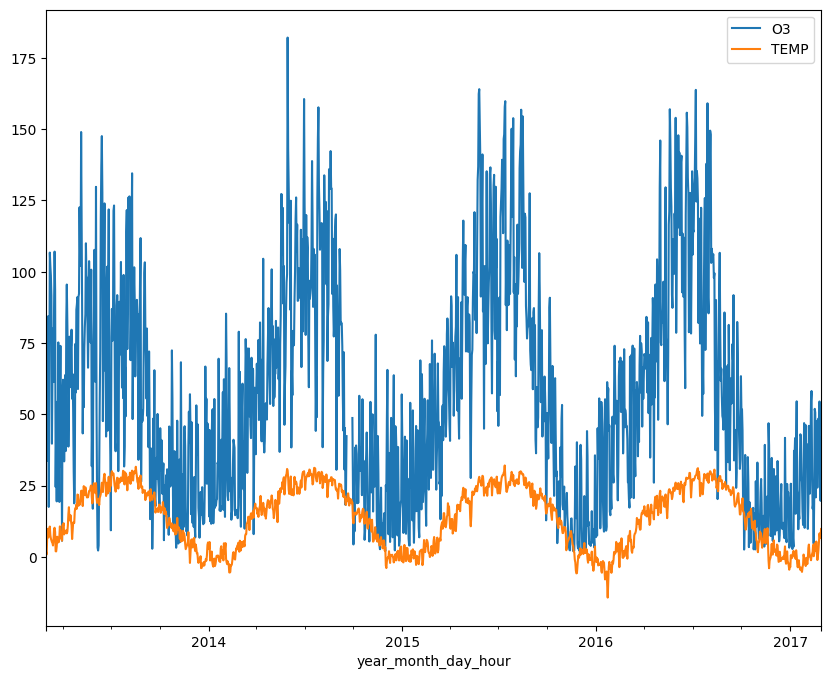

In [ ]:
aq_df.set_index('year_month_day_hour').query(" station == 'Gucheng' ")[['O3', 'TEMP']].plot() # plotting 03 and TEMP data of the Shunyi station

station
Gucheng    Axes(0.125,0.11;0.775x0.77)
Shunyi     Axes(0.125,0.11;0.775x0.77)
Wanliu     Axes(0.125,0.11;0.775x0.77)
dtype: object

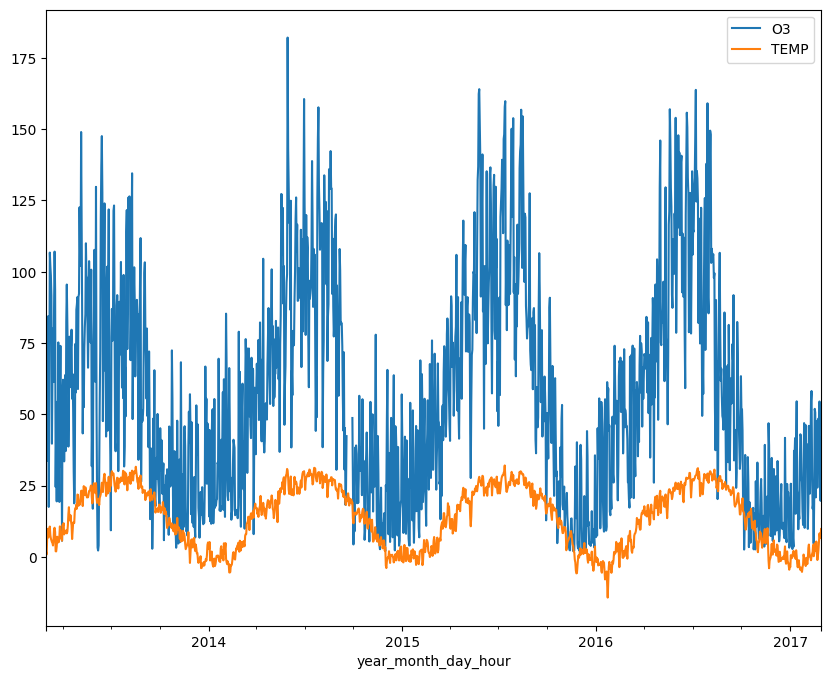

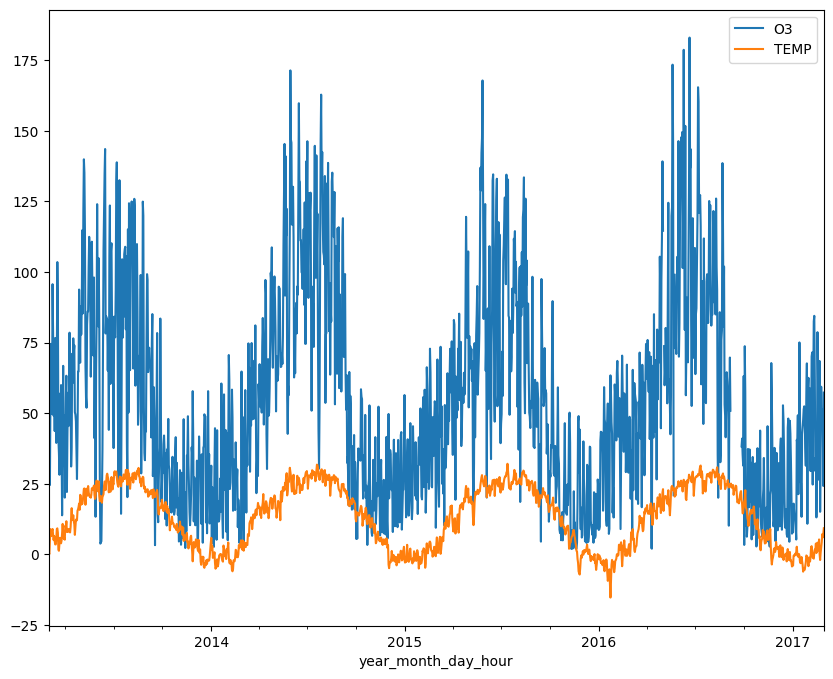

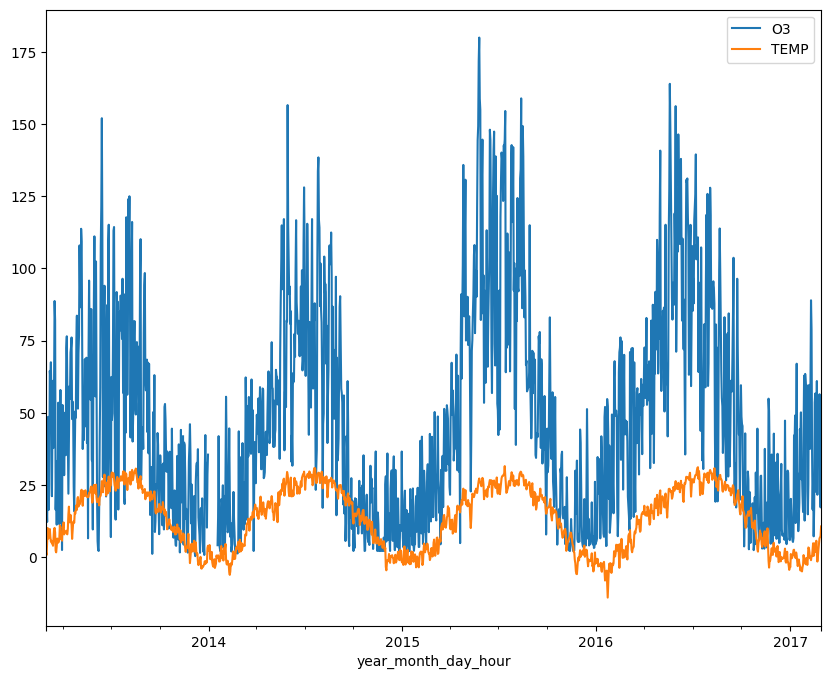

In [ ]:
aq_df.set_index('year_month_day_hour').groupby('station')[['O3', 'TEMP']].plot()

Now we begin modeling with facebook prophet. We are going to apply univariate analysis on our prophet model. In order to observe how multitime series can be done.

In [ ]:
from prophet import Prophet

In [ ]:
aq_df_final = aq_df[['year_month_day_hour', 'O3', 'TEMP', 'station']].rename({'year_month_day_hour': 'ds', 'O3': 'y'}, axis='columns')
# our target column is Ozone (O3)

In [ ]:
aq_df_final

,ds,y,TEMP,station
0,2013-03-01,77.130435,1.691667,Gucheng
1,2013-03-02,39.583333,0.820833,Gucheng
2,2013-03-03,33.708333,6.562500,Gucheng
3,2013-03-04,67.250000,9.795833,Gucheng
4,2013-03-05,84.375000,6.750000,Gucheng
...,...,...,...,...
4378,2017-02-24,38.583333,4.395833,Wanliu
4379,2017-02-25,56.375000,6.387500,Wanliu
4380,2017-02-26,30.250000,6.720833,Wanliu
4381,2017-02-27,17.136364,7.220833,Wanliu


In [ ]:
stations = aq_df_final.groupby('station')

In [ ]:
stations.head()

,ds,y,TEMP,station
0,2013-03-01,77.130435,1.691667,Gucheng
1,2013-03-02,39.583333,0.820833,Gucheng
2,2013-03-03,33.708333,6.562500,Gucheng
3,2013-03-04,67.250000,9.795833,Gucheng
4,2013-03-05,84.375000,6.750000,Gucheng
1461,2013-03-01,62.478261,0.541667,Shunyi
1462,2013-03-02,40.416667,0.083333,Shunyi
1463,2013-03-03,24.541667,5.029167,Shunyi
1464,2013-03-04,55.125000,8.937500,Shunyi
1465,2013-03-05,74.541667,6.450000,Shunyi


In [ ]:
for station in stations.groups:
  group = stations.get_group(station)
  train = group[(group['ds'] >= '2013-03-01') & (group['ds']<= '2016-0-28')]
  test = group(group['ds'] > '2016-02-28')
  print(test.shape)

In [ ]:
target = pd.DataFrame()

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7v5_uz60/b7dpxhvs.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7v5_uz60/sksv46pt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=95213', 'data', 'file=/tmp/tmp7v5_uz60/b7dpxhvs.json', 'init=/tmp/tmp7v5_uz60/sksv46pt.json', 'output', 'file=/tmp/tmp7v5_uz60/prophet_modelalwil8xg/prophet_model-20231029090048.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:00:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:00:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7v

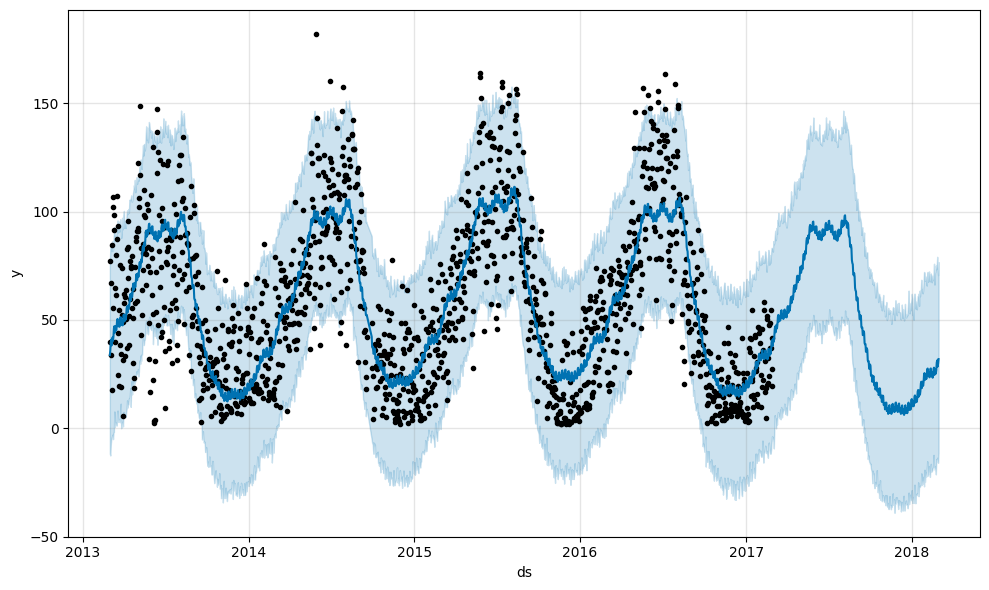

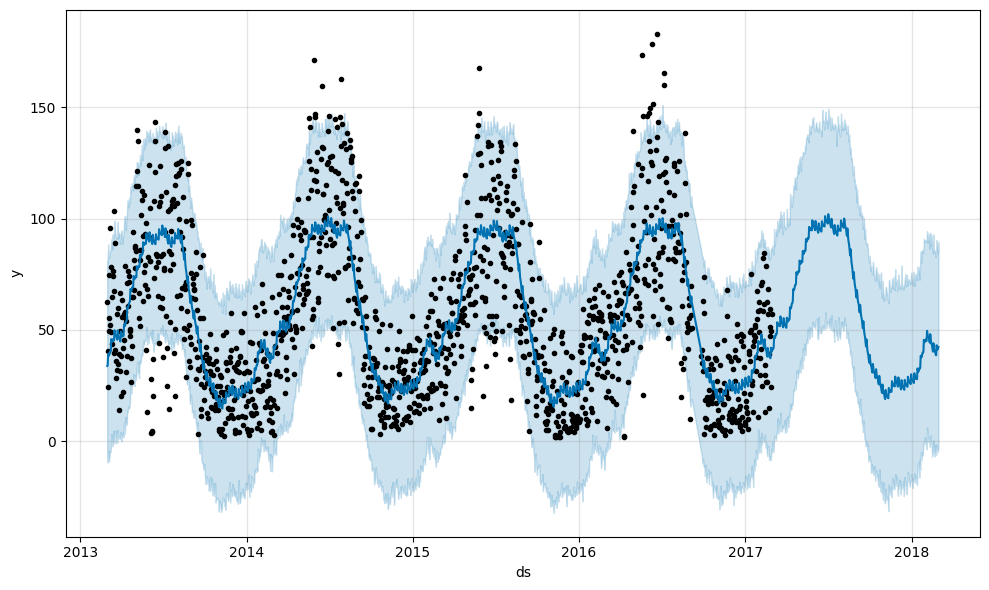

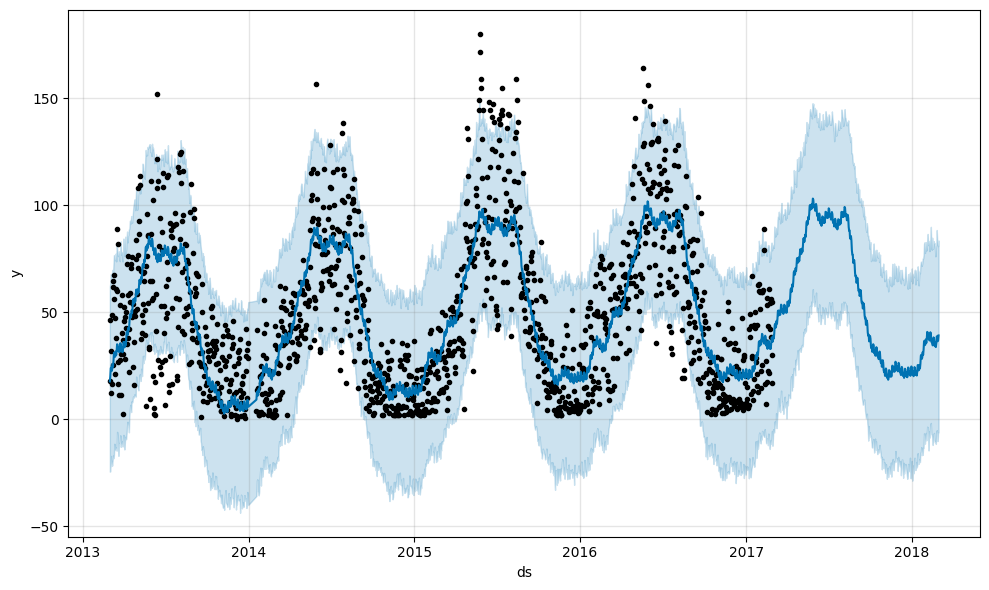

In [ ]:
for station in stations.groups:
  group = stations.get_group(station)

  m= Prophet(interval_width=0.95)
  m.fit(group)
  future = m.make_future_dataframe(periods = 366)  # we are creating a dataframe to predict the data of the following year
  forecast = m.predict(future)
  m.plot(forecast)
  forecast = forecast.rename(columns={'yhat': 'yhat_'+station})
   # we are renaming the forecast column because when the loop iterates it will override the existing column
  target = pd.merge(target, forecast.set_index('ds'), how= 'outer', left_index=True, right_index=True)

In [ ]:
target

,trend_x,yhat_lower_x,yhat_upper_x,trend_lower_x,trend_upper_x,additive_terms_x,additive_terms_lower_x,additive_terms_upper_x,weekly_x,weekly_lower_x,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat_Wanliu
ds,,,,,,,,,,,,,,,,,,,,,
2013-03-01,48.925518,-11.687506,76.944118,48.925518,48.925518,-15.170931,-15.170931,-15.170931,-1.940617,-1.940617,...,-1.924737,-1.924737,-1.924737,-17.371995,-17.371995,-17.371995,0.0,0.0,0.0,17.670618
2013-03-02,48.940745,-12.582014,82.820065,48.940745,48.940745,-13.106699,-13.106699,-13.106699,-0.800465,-0.800465,...,-0.469764,-0.469764,-0.469764,-16.497997,-16.497997,-16.497997,0.0,0.0,0.0,20.011889
2013-03-03,48.955971,-7.732965,85.447880,48.955971,48.955971,-9.343817,-9.343817,-9.343817,2.014873,2.014873,...,2.407503,2.407503,2.407503,-15.563291,-15.563291,-15.563291,0.0,0.0,0.0,23.836162
2013-03-04,48.971198,-5.365042,85.346829,48.971198,48.971198,-8.094037,-8.094037,-8.094037,2.304968,2.304968,...,1.930540,1.930540,1.930540,-14.583130,-14.583130,-14.583130,0.0,0.0,0.0,24.351660
2013-03-05,48.986424,-4.271929,81.762042,48.986424,48.986424,-10.723833,-10.723833,-10.723833,-1.285046,-1.285046,...,-0.940745,-0.940745,-0.940745,-13.573758,-13.573758,-13.573758,0.0,0.0,0.0,22.502046
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-02-25,44.985575,-14.706081,74.824845,42.146809,47.666803,-14.648608,-14.648608,-14.648608,2.014873,2.014873,...,2.407503,2.407503,2.407503,-20.124089,-20.124089,-20.124089,0.0,0.0,0.0,38.717064
2018-02-26,44.962584,-13.597629,79.148933,42.115636,47.655625,-13.642553,-13.642553,-13.642553,2.304968,2.304968,...,1.930540,1.930540,1.930540,-19.638684,-19.638684,-19.638684,0.0,0.0,0.0,38.728844
2018-02-27,44.939593,-15.506250,73.615000,42.084463,47.648772,-16.454368,-16.454368,-16.454368,-1.285046,-1.285046,...,-0.940745,-0.940745,-0.940745,-19.047760,-19.047760,-19.047760,0.0,0.0,0.0,36.451822


In [ ]:
target = target[['yhat_'+station for station in stations.groups.keys()]]

In [ ]:
target

,yhat_Gucheng,yhat_Shunyi,yhat_Wanliu
ds,,,
2013-03-01,33.754587,33.778338,17.670618
2013-03-02,35.834046,34.115574,20.011889
2013-03-03,39.612155,39.278892,23.836162
2013-03-04,40.877161,38.749987,24.351660
2013-03-05,38.262591,38.401185,22.502046
...,...,...,...
2018-02-25,30.336967,43.102016,38.717064
2018-02-26,31.320031,41.998440,38.728844
2018-02-27,28.485225,41.153283,36.451822


<Axes: xlabel='ds'>

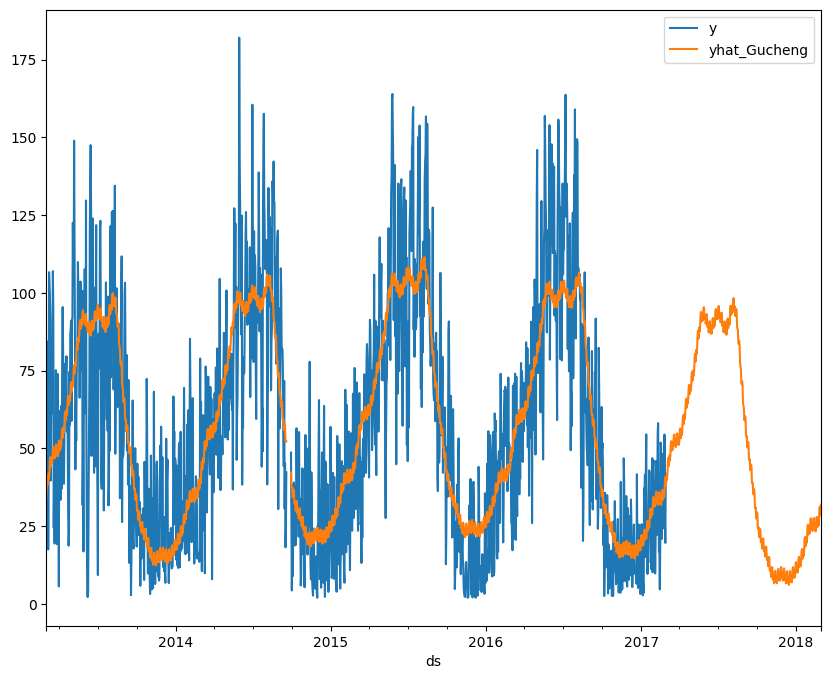

In [ ]:
pd.concat([aq_df_final.set_index('ds').query("station == 'Gucheng'")['y'], target['yhat_Gucheng']], axis=1).plot()

<Axes: xlabel='ds'>

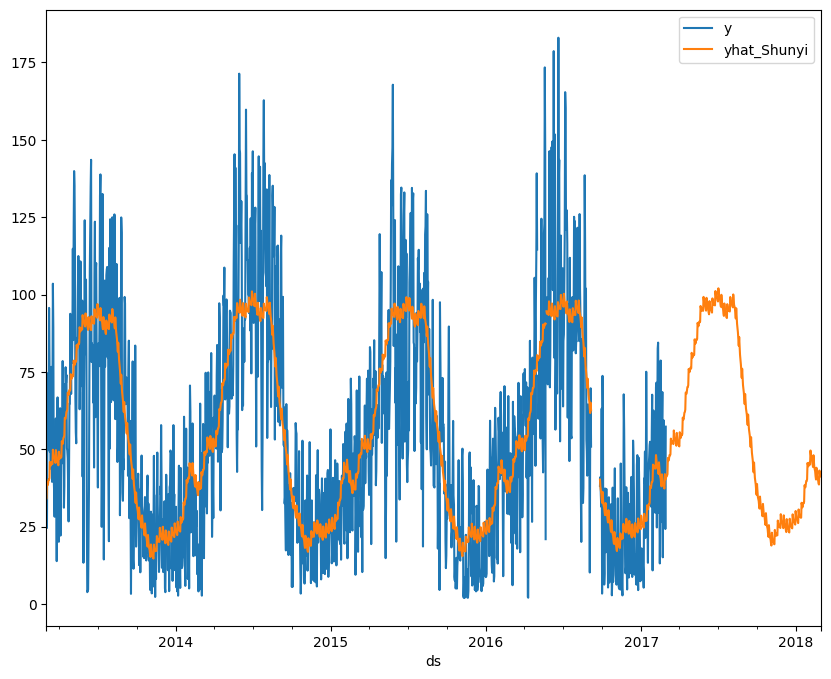

In [ ]:
pd.concat([aq_df_final.set_index('ds').query("station == 'Shunyi'")['y'], target['yhat_Shunyi']], axis=1).plot()

<Axes: xlabel='ds'>

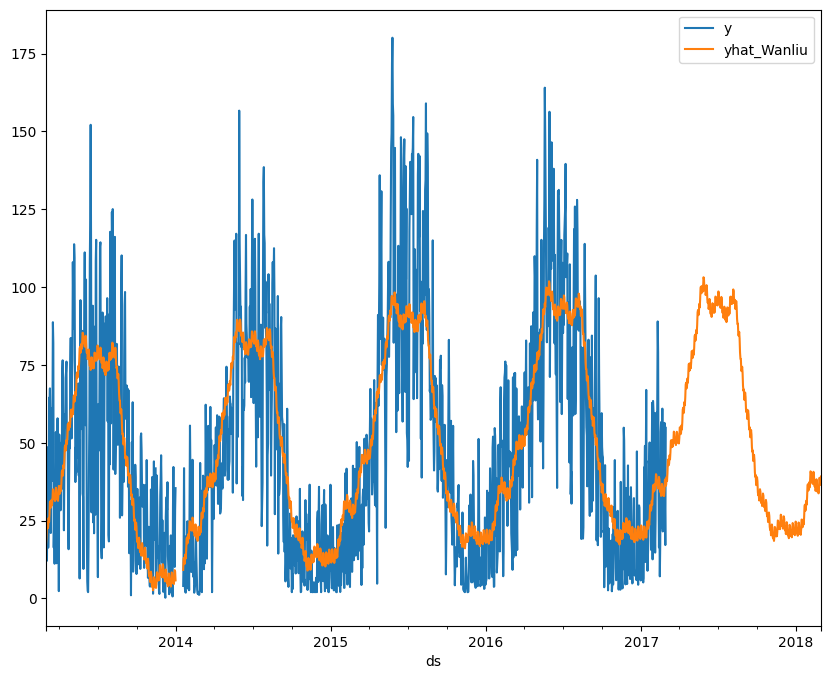

In [ ]:
pd.concat([aq_df_final.set_index('ds').query("station == 'Wanliu'")['y'], target['yhat_Wanliu']], axis=1).plot()

We can see that our model can predict the seasonality of the data quite accurately although it fails to predict the actual value. If we use multivariate analysis in this multiple time series model, we can predict the actual value more accurately.